In [ ]:
import pandas as pd
import numpy as np

# Load raw data
data = pd.read_csv('../Inputs/data/raw_data/BrentOilPrices.csv')

# Handle missing values
data = data.fillna(method='ffill')

# Save processed data
data.to_csv('../Inputs/data/processed_data/brent_oil_prices.csv', index=False)


/tmp/ipykernel_47775/713825612.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  price_df['Date'] = pd.to_datetime(price_df['Date'])
/tmp/ipykernel_47775/713825612.py:19: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_price_df = price_df.resample('A').mean()


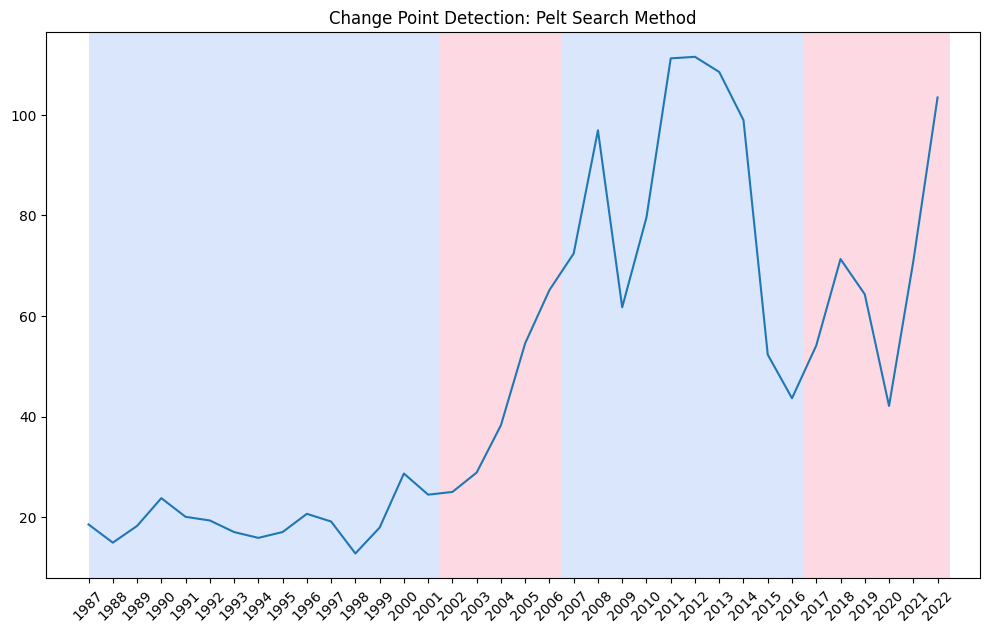

Turning points (Pelt): [2002, 2007, 2017]


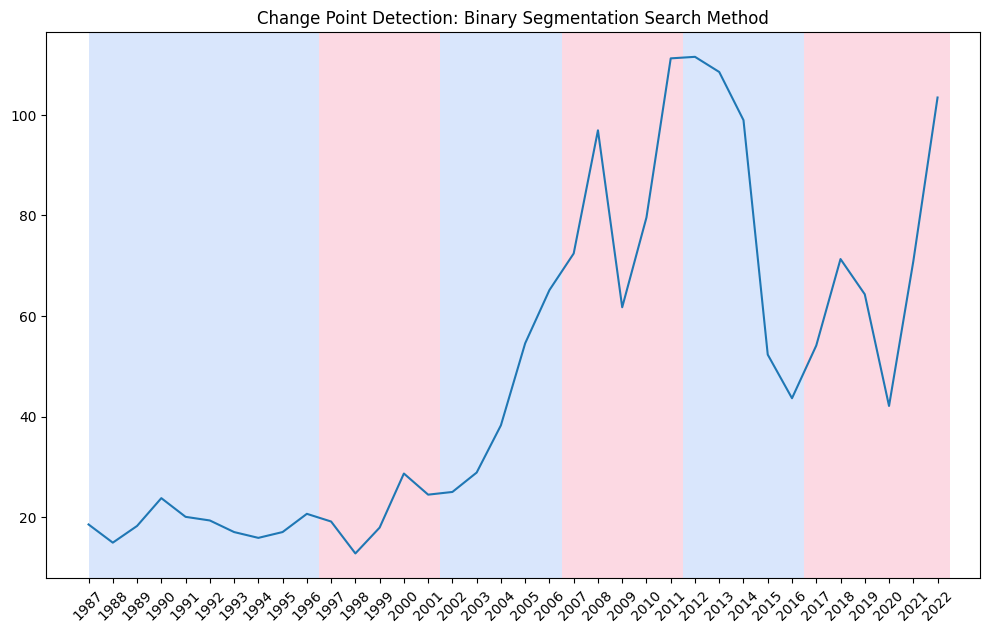

Turning points (Binary Segmentation): [1997, 2002, 2007, 2012, 2017]


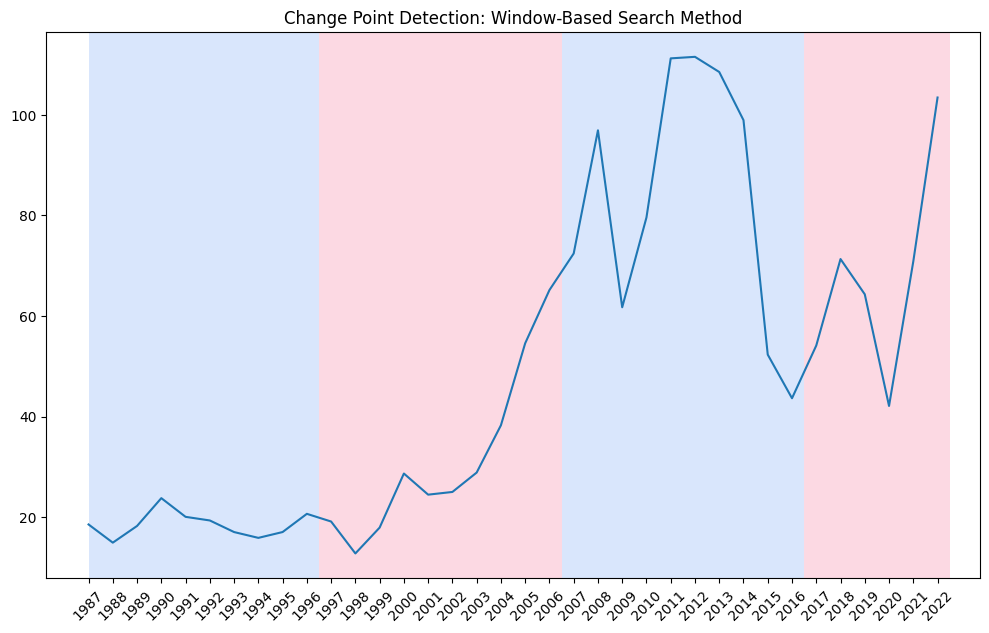

Turning points (Window-Based): [1997, 2007, 2017]


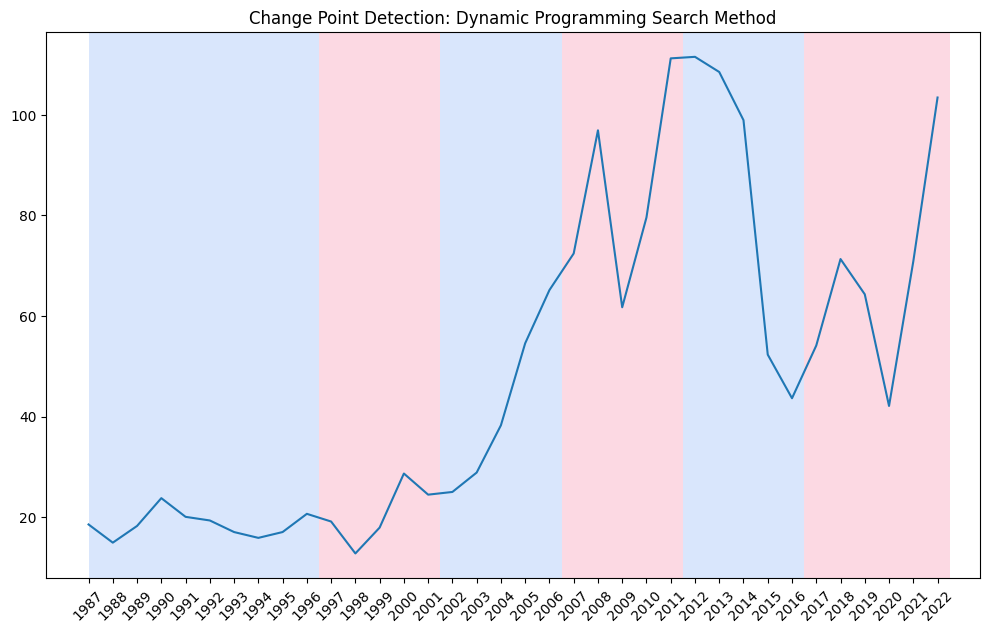

Turning points (Dynamic Programming): [1997, 2002, 2007, 2012, 2017]


In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Load and format the data
price_df = pd.read_csv("../Inputs/data/processed_data/cleaned_brent_prices_data.csv")

# Convert the 'Date' column to datetime object
price_df['Date'] = pd.to_datetime(price_df['Date'])

# Drop rows where the 'Date' conversion failed
price_df = price_df.dropna(subset=['Date'])

# Set 'Date' as the index
price_df.set_index('Date', inplace=True)

# Resample the data to annual frequency, taking the mean price for each year
annual_price_df = price_df.resample('A').mean()

# Convert the time series values to a numpy 1D array
points = annual_price_df['Price'].values
dates = annual_price_df.index.year  # Extract the years for x-axis labels

# Function to display results and extract turning point years
def display_and_extract_turning_points(points, model_cls, method_name, **kwargs):
    model = kwargs.pop('model', 'l2')  # Remove 'model' from kwargs if it exists
    pen = kwargs.pop('pen', None)  # Remove 'pen' from kwargs if it exists
    n_bkps = kwargs.pop('n_bkps', 3)  # Remove 'n_bkps' from kwargs if it exists
    algo = model_cls(model=model, **kwargs).fit(points)
    
    if pen is not None:
        result = algo.predict(pen=pen)
    else:
        result = algo.predict(n_bkps=n_bkps)
    
    turning_point_years = [dates[cp] for cp in result[:-1]]  # exclude the last breakpoint
    rpt.show.display(points, result, figsize=(10, 6))
    plt.xticks(ticks=np.arange(len(dates)), labels=dates, rotation=45)  # Set x-axis labels
    plt.title(f'Change Point Detection: {method_name}')
    plt.show()
    return turning_point_years

# RUPTURES PACKAGE

# Change point detection with the Pelt search method
turning_points_pelt = display_and_extract_turning_points(points, rpt.Pelt, 'Pelt Search Method', model="rbf", pen=0.5)
print(f'Turning points (Pelt): {turning_points_pelt}')

# Change point detection with the Binary Segmentation search method
turning_points_binseg = display_and_extract_turning_points(points, rpt.Binseg, 'Binary Segmentation Search Method', model="l2", n_bkps=5)
print(f'Turning points (Binary Segmentation): {turning_points_binseg}')

# Change point detection with the Window-based search method
turning_points_window = display_and_extract_turning_points(points, rpt.Window, 'Window-Based Search Method', model="l2", width=3, n_bkps=5)
print(f'Turning points (Window-Based): {turning_points_window}')

# Change point detection with the Dynamic Programming search method
turning_points_dynp = display_and_extract_turning_points(points, rpt.Dynp, 'Dynamic Programming Search Method', model="l1", min_size=1, n_bkps=5)
print(f'Turning points (Dynamic Programming): {turning_points_dynp}')

